In [17]:
import pandas as pd
import os
import seaborn as sns


def district(borough: int):
    if borough == 1:
        return "Manhattan"
    elif borough == 2:
        return "Bronx"
    elif borough == 3:
        return "Brooklyn"
    elif borough == 4:
        return "Queens"
    elif borough == 5:
        return "Staten"



dir_path = "dataset/"
res = []
data = []
for path in os.listdir(dir_path):
    res.append(path)
    dirty_data = pd.read_excel(dir_path + path, skiprows=4)
    dirty_data.columns = [column.lower().replace("\n", "")
                          .replace(" ", "_").replace("-", "_")
                          for column in
                          dirty_data.columns]
    data.append(dirty_data)
# df = pd.read_csv("dataset/nyt1.csv")
data = pd.concat(data)

data.insert(1, "district", [district(a) for a in data.borough])
data.columns
# print(data)

Index(['borough', 'district', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'ease_ment',
       'building_class_at_present', 'address', 'apartmentnumber', 'zip_code',
       'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'saleprice', 'sale_date'],
      dtype='object')

In [18]:
data

,borough,district,neighborhood,building_class_category,tax_class_at_present,block,lot,ease_ment,building_class_at_present,address,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,saleprice,sale_date
0,2,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,3028,25,,A5,412 EAST 179TH STREET,...,1,0,1,1842,2048,1901,1,A5,355000,2013-07-08
1,2,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,3039,28,,A1,2329 WASHINGTON AVENUE,...,1,0,1,1103,1290,1910,1,A1,474819,2013-05-20
2,2,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,3046,39,,A1,2075 BATHGATE AVENUE,...,1,0,1,1986,1344,1899,1,A1,210000,2013-03-12
3,2,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,3046,52,,A1,2047 BATHGATE AVENUE,...,1,0,1,2329,1431,1901,1,A1,343116,2013-07-01
4,2,Bronx,BATHGATE,02 TWO FAMILY HOMES,1,2900,61,,S2,406 EAST TREMONT AVENUE,...,2,1,3,1855,4452,1931,1,S2,0,2012-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6351,5,Staten,WOODROW,02 TWO FAMILY HOMES,1,7349,10,,B9,63 PHEASANT LANE,...,2,0,2,2590,2450,1998,1,B9,505000,2013-05-15
6352,5,Staten,WOODROW,02 TWO FAMILY HOMES,1,7349,35,,B9,33 QUAIL LANE,...,2,0,2,2255,2377,1998,1,B9,0,2013-04-09
6353,5,Staten,WOODROW,02 TWO FAMILY HOMES,1,7351,11,,B2,40 HERRICK AVENUE,...,2,0,2,4000,2962,2000,1,B2,0,2012-08-01
6354,5,Staten,WOODROW,22 STORE BUILDINGS,4,7100,16,,K6,639 VETERANS ROAD WEST,...,0,1,1,21663,6950,2008,4,K6,1300000,2013-05-29


    district  borough  neighborhood  building_class_category  \
0      Bronx     5268          5268                     5268   
1   Brooklyn    23373         23373                    23373   
2  Manhattan    27395         27395                    27395   
3     Queens    23583         23583                    23583   
4     Staten     6356          6356                     6356   

   tax_class_at_present  block    lot  ease_ment  building_class_at_present  \
0                  5268   5268   5268       5268                       5268   
1                 23373  23373  23373      23373                      23373   
2                 27395  27395  27395      27395                      27395   
3                 23583  23583  23583      23583                      23583   
4                  6356   6356   6356       6356                       6356   

   address  ...  residential_units  commercial_units  total_units  \
0     5268  ...               5268              5268         5268   
1 

[Text(0.5, 1.0, 'Number of purchases by district'), Text(0, 0.5, 'Orders ')]

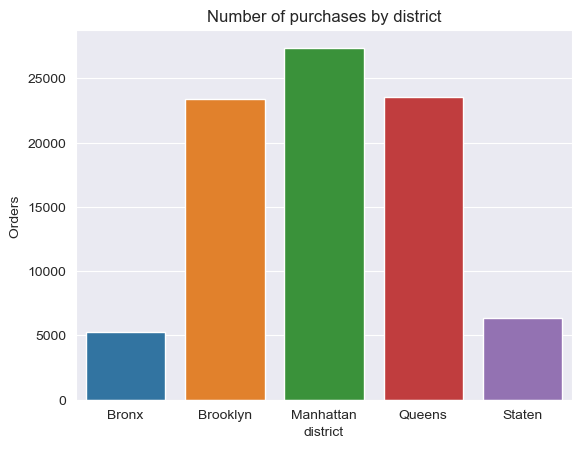

In [19]:
district_data_order = data.groupby(["district"], as_index=False).count()
print(district_data_order)

ax = sns.barplot(data=district_data_order,
                 x=district_data_order.district,
                 y=district_data_order.borough,
                 )
ax.set(title= "Number of purchases by district" , ylabel="Orders ")

district: ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten'],
 earnings$:[2856904409, 12349936217, 50625977883, 8602994166, 1660481167]


[Text(0.5, 1.0, 'Orders in district'), Text(0, 0.5, 'sum of purchases')]

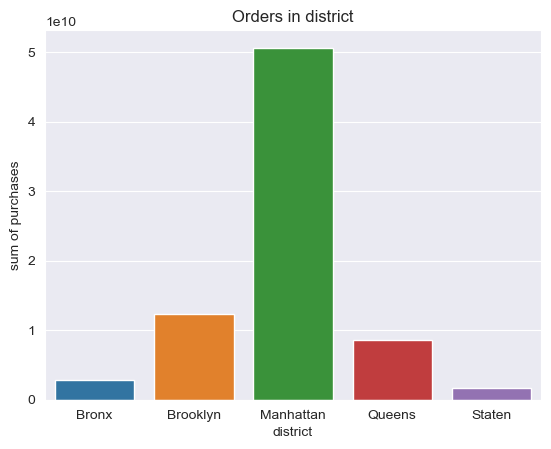

In [20]:
sum_data_order = data.groupby(["district"], as_index=False).sum()
print("district: {},\n earnings$:{}" .format(sum_data_order.district.to_list() , sum_data_order.saleprice.to_list() ))

ax = sns.barplot(data=sum_data_order,
                 x=sum_data_order.district,
                 y=sum_data_order.saleprice,
                 )
ax.set(title= "Orders in district" , ylabel="sum of purchases")

In [21]:
sum_data_order

,district,borough,block,lot,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,saleprice
0,Bronx,10536,21957923,1405669,55104752,32345,1350,33713,35590039,32691234,9246987,2856904409
1,Brooklyn,70119,93124350,7139074,262045897,50389,4612,55387,83183418,70242407,39292267,12349936217
2,Manhattan,27395,30399320,20321312,274740623,48391,10273,62719,26455769,262225661,40924850,50625977883
3,Queens,94332,147645680,4760341,267821618,40008,4731,45243,76114468,55382073,43272131,8602994166
4,Staten,31780,21630789,1229635,65209191,8073,409,8475,43912853,13610226,11822414,1660481167


In [22]:
data.insert(1, "quarter", [str(value.quarter) for value in data.sale_date.to_list()])
data

,borough,quarter,district,neighborhood,building_class_category,tax_class_at_present,block,lot,ease_ment,building_class_at_present,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,saleprice,sale_date
0,2,3,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,3028,25,,A5,...,1,0,1,1842,2048,1901,1,A5,355000,2013-07-08
1,2,2,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,3039,28,,A1,...,1,0,1,1103,1290,1910,1,A1,474819,2013-05-20
2,2,1,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,3046,39,,A1,...,1,0,1,1986,1344,1899,1,A1,210000,2013-03-12
3,2,3,Bronx,BATHGATE,01 ONE FAMILY HOMES,1,3046,52,,A1,...,1,0,1,2329,1431,1901,1,A1,343116,2013-07-01
4,2,3,Bronx,BATHGATE,02 TWO FAMILY HOMES,1,2900,61,,S2,...,2,1,3,1855,4452,1931,1,S2,0,2012-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6351,5,2,Staten,WOODROW,02 TWO FAMILY HOMES,1,7349,10,,B9,...,2,0,2,2590,2450,1998,1,B9,505000,2013-05-15
6352,5,2,Staten,WOODROW,02 TWO FAMILY HOMES,1,7349,35,,B9,...,2,0,2,2255,2377,1998,1,B9,0,2013-04-09
6353,5,3,Staten,WOODROW,02 TWO FAMILY HOMES,1,7351,11,,B2,...,2,0,2,4000,2962,2000,1,B2,0,2012-08-01
6354,5,2,Staten,WOODROW,22 STORE BUILDINGS,4,7100,16,,K6,...,0,1,1,21663,6950,2008,4,K6,1300000,2013-05-29


In [23]:
district_data_quarter = data.groupby(["district","quarter"], as_index=False).count()
district_data_quarter

,district,quarter,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease_ment,building_class_at_present,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,saleprice,sale_date
0,Bronx,1,1237,1237,1237,1237,1237,1237,1237,1237,...,1237,1237,1237,1237,1237,1237,1237,1237,1237,1237
1,Bronx,2,1346,1346,1346,1346,1346,1346,1346,1346,...,1346,1346,1346,1346,1346,1346,1346,1346,1346,1346
2,Bronx,3,1289,1289,1289,1289,1289,1289,1289,1289,...,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289
3,Bronx,4,1396,1396,1396,1396,1396,1396,1396,1396,...,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396
4,Brooklyn,1,5264,5264,5264,5264,5264,5264,5264,5264,...,5264,5264,5264,5264,5264,5264,5264,5264,5264,5264
5,Brooklyn,2,5827,5827,5827,5827,5827,5827,5827,5827,...,5827,5827,5827,5827,5827,5827,5827,5827,5827,5827
6,Brooklyn,3,6165,6165,6165,6165,6165,6165,6165,6165,...,6165,6165,6165,6165,6165,6165,6165,6165,6165,6165
7,Brooklyn,4,6117,6117,6117,6117,6117,6117,6117,6117,...,6117,6117,6117,6117,6117,6117,6117,6117,6117,6117
8,Manhattan,1,5374,5374,5374,5374,5374,5374,5374,5374,...,5374,5374,5374,5374,5374,5374,5374,5374,5374,5374
9,Manhattan,2,6554,6554,6554,6554,6554,6554,6554,6554,...,6554,6554,6554,6554,6554,6554,6554,6554,6554,6554


In [ ]:
5827

[Text(0.5, 1.0, 'Number of purchases by district and quarter'),
 Text(0, 0.5, 'number of purchases'),
 Text(0.5, 0, 'district')]

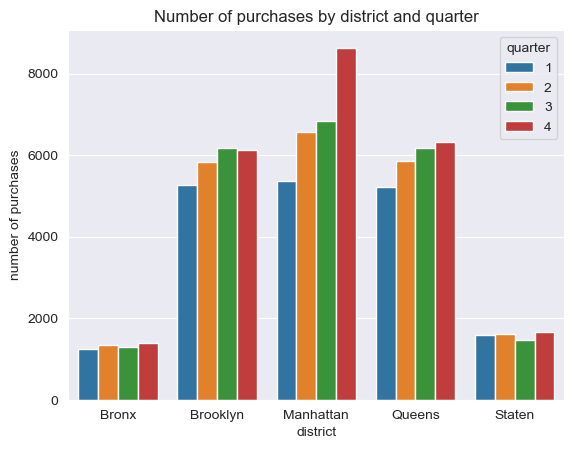

In [24]:
ax = sns.barplot(data=district_data_quarter,
                 x=district_data_quarter.district,
                 y=district_data_quarter.borough,
                 hue=district_data_quarter.quarter
                 )
ax.set(title= "Number of purchases by district and quarter" , ylabel="number of purchases",xlabel="district")


<AxesSubplot:xlabel='date', ylabel='saleprice'>

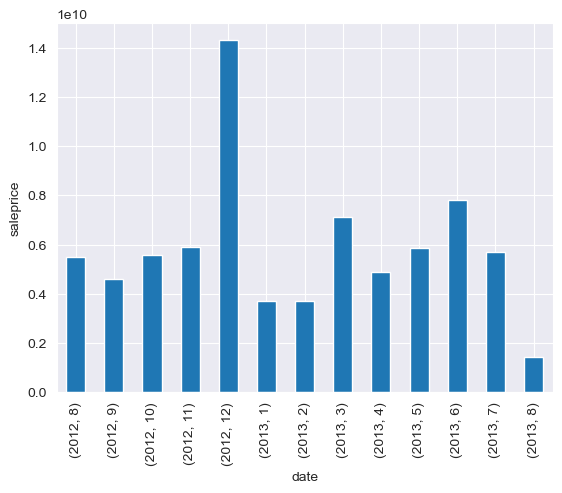

In [25]:
test = data.groupby([data["sale_date"].dt.year, data["sale_date"].dt.month],group_keys=True)["saleprice"].sum()
# test.sale_date
test.plot(kind = "bar", xlabel="date", ylabel="saleprice")
# ax = sns.barplot(data=test,
#                  x=sale_data,
#                  y=test.saleprice,
#                  )